In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# load dataset

original_dataset = pd.read_csv("loan.csv")
df = original_dataset.copy()

In [3]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
# check the null values
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

##### No null values found!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [6]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [7]:
# check the duplicated
df[df.duplicated()]

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status


#### No duplicates found

In [9]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [12]:
df['age'].value_counts()

age
32    3
27    3
28    3
29    3
38    3
30    3
31    3
43    2
35    2
40    2
33    2
25    2
41    2
45    2
34    2
44    2
48    2
36    2
39    2
37    2
42    2
26    2
53    1
46    1
55    1
24    1
51    1
49    1
54    1
47    1
52    1
50    1
Name: count, dtype: int64

In [13]:
df['credit_score'].value_counts()

credit_score
720    4
740    4
760    4
780    3
790    3
750    3
770    3
700    3
800    3
710    2
570    2
810    2
600    2
670    2
630    2
650    2
680    2
730    2
690    2
620    2
640    2
590    1
580    1
610    1
820    1
560    1
660    1
830    1
Name: count, dtype: int64

In [14]:
df['education_level'].value_counts()

education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64

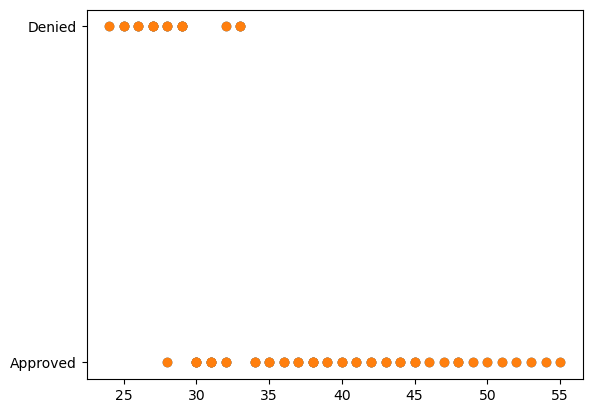

In [16]:
plt.scatter(df['age'], df['loan_status'])
plt.show()

##### Categorical variable analysis

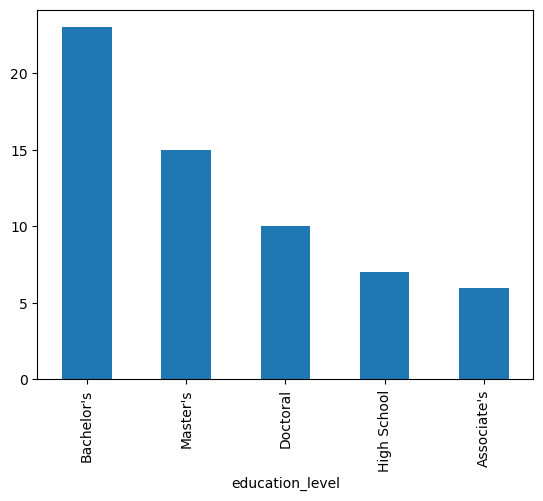

In [20]:
df['education_level'].value_counts().plot(kind='bar')
plt.show()

In [22]:
print("=== DATASET SHAPE ===")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

=== DATASET SHAPE ===
Dataset shape: (61, 8)
Rows: 61, Columns: 8


In [23]:
print("=== LOAN STATUS DISTRIBUTION ===")
print(df['loan_status'].value_counts())
print("\nLoan Status Percentage:")
print(df['loan_status'].value_counts(normalize=True) * 100)

=== LOAN STATUS DISTRIBUTION ===
loan_status
Approved    45
Denied      16
Name: count, dtype: int64

Loan Status Percentage:
loan_status
Approved    73.770492
Denied      26.229508
Name: proportion, dtype: float64


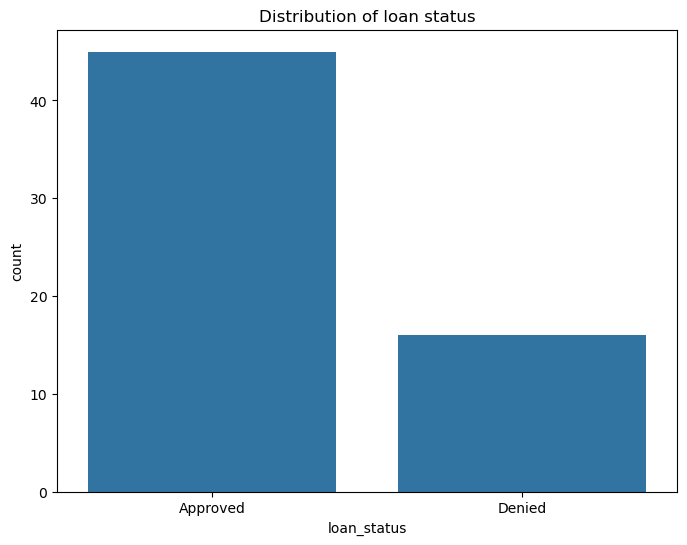

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of loan status')
plt.show()

#### Numerical variable analysis

=== NUMERICAL VARIABLES ANALYSIS ===


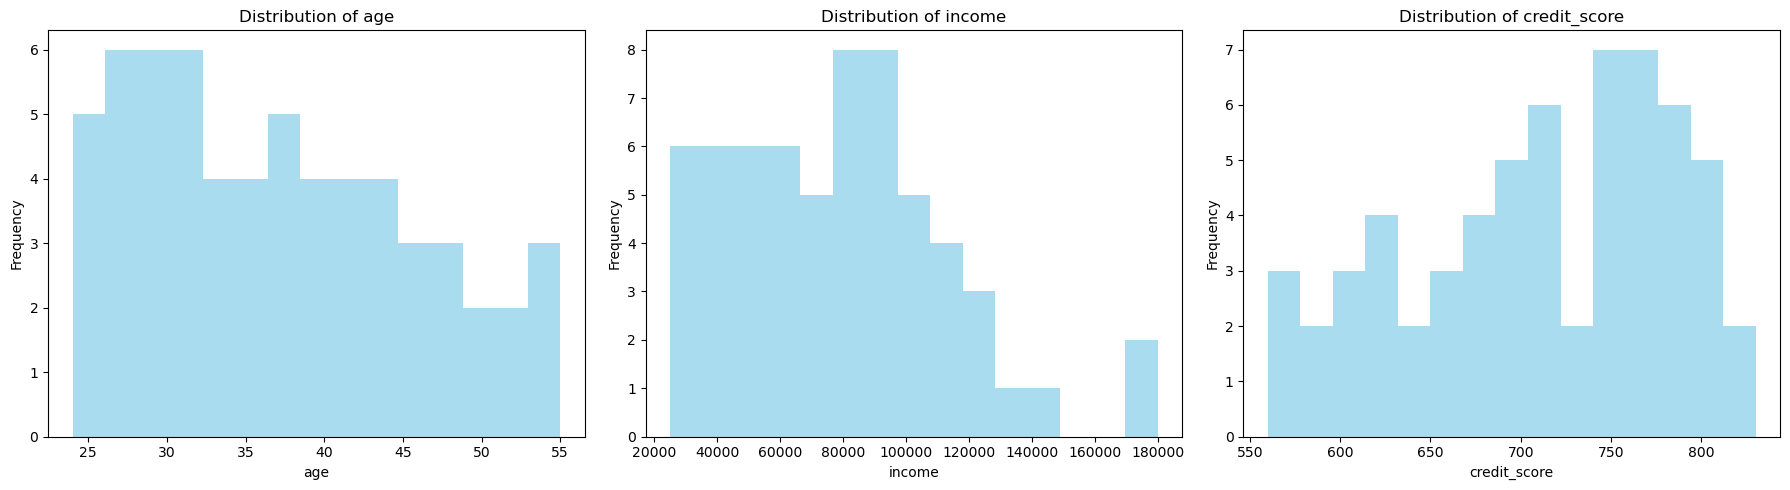

In [26]:
print("=== NUMERICAL VARIABLES ANALYSIS ===")
numerical_cols = ['age', 'income', 'credit_score']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=15, alpha=0.7, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

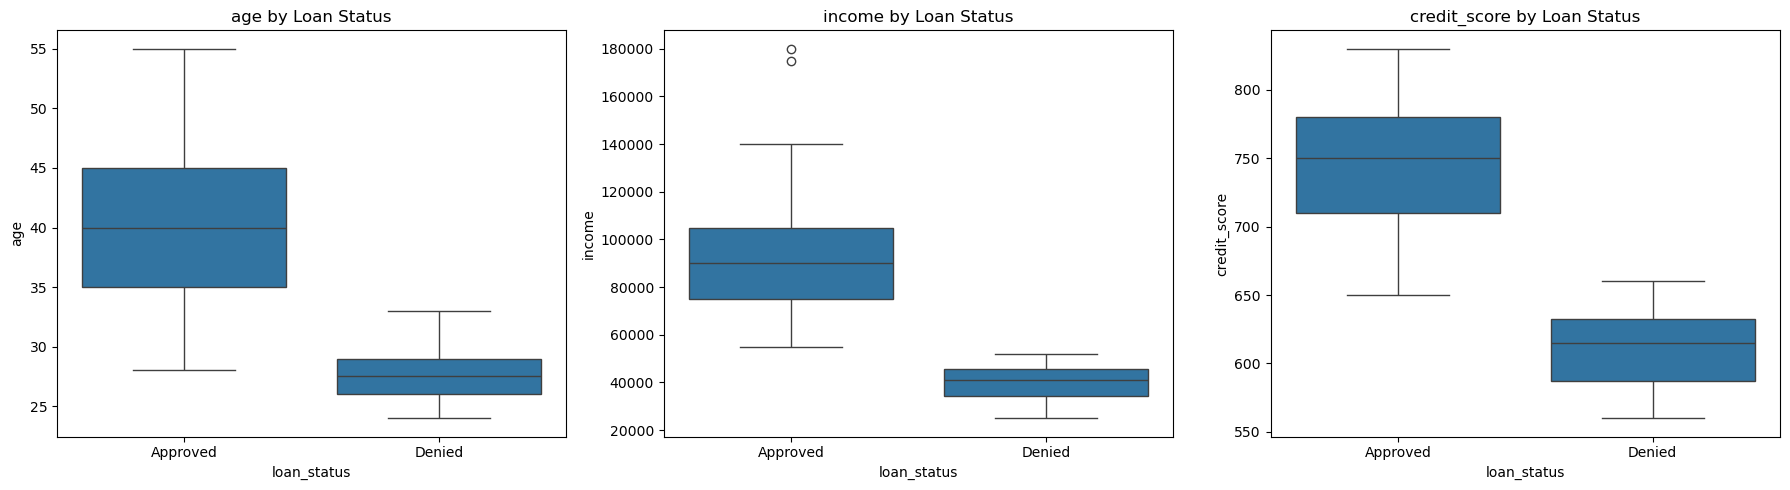

In [27]:
# Boxplots for numerical variables by loan status
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='loan_status', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Loan Status')
plt.tight_layout()
plt.show()